# Classifier Performance with Scikit-Learn


In september, the version 0.18 has been released. There is now a new ```sklearn.model_selection``` module which groups together the functionalities of ```sklearn.cross_validation```, ```sklearn.grid_search``` and ```sklearn.learning_curve```.

## prepare the classifier
In this example, I'll be using the Titanic dataset. I already cleaned the data and did some features engineering.
I am trying to predict weither a passenger survived or not. The output of my models will be Survived and will take the values 0 (did not survive) or 1 (survived).
I'll train 2 classifiers using different algorithms. At this point, the classifiers haven't been optimized.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
% matplotlib inline

In [2]:
# in 0.17: from sklearn import cross_validation
from sklearn.model_selection import train_test_split

df = pd.read_pickle('metrics_dataset.pickle')

X = np.array(df.drop(['Survived'], axis=1))
y = np.array(df['Survived'])

# in 0.17: cross_validation.train_test_split(X, y, test_size=0.2 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# we are going to train 2 models to compare performances
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_log = logreg.predict(X_test)

from sklearn.svm import SVC

linsvc = SVC(probability=True)
linsvc.fit(X_train, y_train)
y_svc = linsvc.predict(X_test)


## Accuracy

    accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
    
 **parameters**
- y_true: *array* containing actual values
- y_pred: *array* containing predicted values
- normalize: *boolean*. False return the number of correctly classified samples. True return a fraction of correctly classified samples.
- sample_weight: *array-like* of sample weights 

In [3]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_test, y_log)
print('logistic regression accuracy = %.3f' % log_acc)

svc_acc = accuracy_score(y_test, y_svc)
print('SVC accuracy = %.3f' % svc_acc)

logistic regression accuracy = 0.827
SVC accuracy = 0.760


## Confusion Matrix

    confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

**parameters:**  
- y_true : array containing actual labels
- y_pred : array containing predicted labels
- labels : list of labels to index the matrix
- sample_weights : array-like. Sample weights

**output:**  

||Actual Negative|Actual Positive|
|-|-|-|
|Predictied Negative|True Negative|False Negative|
|Predicted Positive|False Positive|True Positive|


In [4]:
from sklearn.metrics import confusion_matrix

labels = [0,1]
log_matrix = confusion_matrix(y_test, y_log, labels)
print(log_matrix)


[[99 17]
 [14 49]]


In [5]:
# the order of the labels is important
labels = [1,0]
log_matrix = confusion_matrix(y_test, y_log, labels)
print(log_matrix)

[[49 14]
 [17 99]]


In [6]:
# we can also create a matrix using pandas' crosstab() method
pd.crosstab(y_test, y_log, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,99,17
1,14,49


<function matplotlib.pyplot.show>

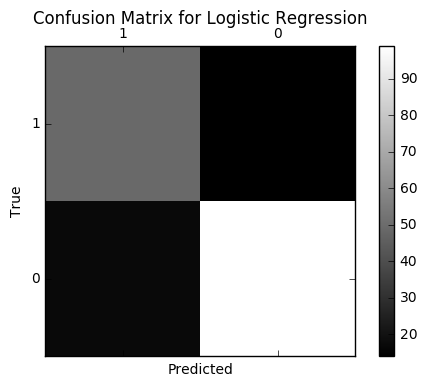

In [7]:
# https://stackoverflow.com/questions/19233771/sklearn-plot-confution-matrix-with-labels
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(log_matrix, cmap = plt.cm.gray)
#cax = ax.matshow(matrix)
plt.title('Confusion Matrix for Logistic Regression')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

## Precision / Recall

    precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    
    recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

**parameters**
- y_true : *array* containing actual labels
- y_pred : *array* containing predicted labels
- labels : *list* the set of label to include if average != binary
- pos_label : *str* or *int*.
- average : *str* [None, binary, micro, macro, samples, weighted]. Required for multiclass/multilabel targets
    - binary: only reports results for the class in pos_label
    - micro: calculate metrics globally (counting total TP, FN and FP)
    - macro: calculate metrics for each label and find unweighted mean
    - weighted: calculate metrics for each label and find weighted mean
    - samples: calculate metrics for each instance and find their average (for multilabel classification)


In [8]:
from sklearn.metrics import precision_score, recall_score

log_precision = precision_score(y_test, y_log)
print('logistic regression precision = %.3f' % log_precision)

svc_precision = precision_score(y_test, y_svc)
print('SVC precision = %.3f' % svc_precision)

log_recall = recall_score(y_test, y_log)
print('logistic regression recall = %.3f' % log_recall)

svc_recall = recall_score(y_test, y_svc)
print('svc recall = %.3f' % svc_recall)

logistic regression precision = 0.742
SVC precision = 0.639
logistic regression recall = 0.778
svc recall = 0.730


## F1-Score

    f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    
**parameters**
- y_true : *array* containing actual labels
- y_pred : *array* containing predicted labels
- labels : *list* of labels to include if average is not set to binary
- pos_label : *string* or *integer*. The class to report if average is set to binary
- average : *string* [None, binary, micro, macro, weighted]
- sample_weight : *array-like*

In [9]:
from sklearn.metrics import f1_score

log_f1 = f1_score(y_test, y_log)
print('logistic regression F1-Score = %.3f' % log_f1)

svc_f1 = f1_score(y_test, y_svc)
print('SVC F1-Score = %.3f' % svc_f1)

logistic regression F1-Score = 0.760
SVC F1-Score = 0.681


In [10]:
f1 = 2 * (log_precision * log_recall) / (log_precision + log_recall)
print('F1-Score = %.3f' % f1)

F1-Score = 0.760


## Learning Curves

    learning_curve(estimator, X, y, groups=None, train_sizes=array([ 0.1, 0.33, 0.55, 0.78, 1. ]), cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch='all', verbose=0)
    
**parameters**
- estimator: our classifier (here it's clf)
- X: *array-like (n_samples x n_features)*. The features of the entire training set
- y: *array_like (n_samples)*. The labels of the entire training set. None for unsupervised learning.
- train_sizes: *array*. Fractions of the maximum number of training examples.
- cv: *integer*. Determine the cross-validation splitting strategy.
- verbose: *integer*. Controls the verbosity. The higher, the more messages.
- n_jobs: *integer*. Number of jobs to run in parallel.

**returns**
- train_size_abs: number of training examples used
- train_scores: scores on training sets
- test_scores: scores on test sets.

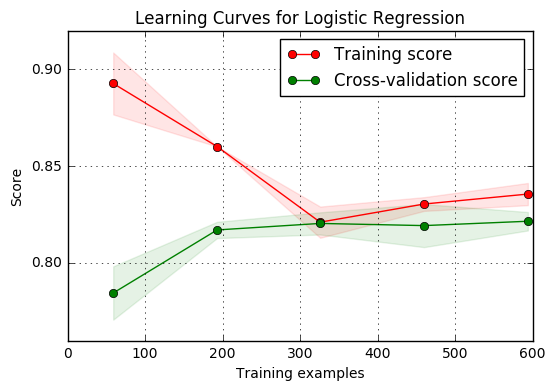

In [11]:
#in 0.17: from sklearn.learning_curve import learning_curve
from sklearn.model_selection import learning_curve

# we use np.linspace() to generate the training set sizes
# linspace(start, stop, num)
train_sizes, train_scores, test_scores = learning_curve(logreg, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.grid()

plt.fill_between(train_sizes, 
                train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std,
                alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std,
                alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')

plt.title('Learning Curves for Logistic Regression')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')

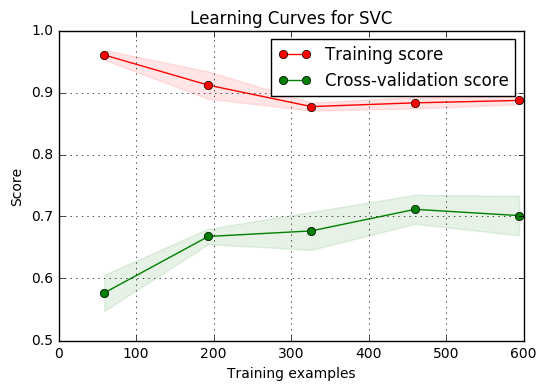

In [12]:
train_sizes, train_scores, test_scores = learning_curve(linsvc, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.grid()

plt.fill_between(train_sizes, 
                train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std,
                alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std,
                alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')

plt.title('Learning Curves for SVC')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')

## Receiver Operating Characteristic (ROC) / Area Under Curve (AUC)


    roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
    
**parameters**
- y_true : *array* of actual labels
- y_score : *array* of target scores. Can be probability estimates of the positive class, confidence values or non-threshold measure of decisions. 
- pos_label : *integer*. label considered as positive 
- sample_weight : *array* of sample weights
- drop_intermediate : *boolean*. Whether we drop some suboptimal threshold.

**returns**
- fpr : *array* of increasing false positive rates
- tpr : *array* of increasing true positive rates
- thresholds: *array* of decreasing thresholds


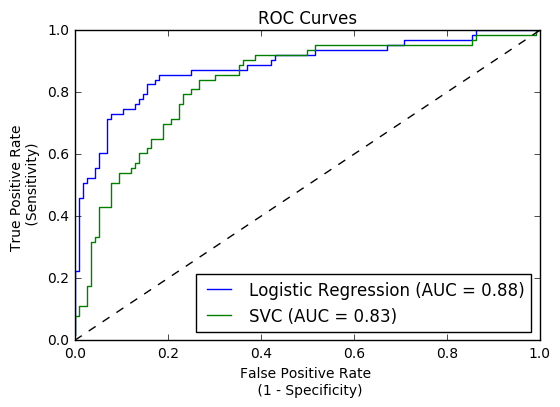

In [13]:
from sklearn.metrics import roc_curve, auc

fpr_log, tpr_log, thresholdlog = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
auc_log = auc(fpr_log, tpr_log)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, linsvc.predict_proba(X_test)[:,1])
auc_svc = auc(fpr_svc, tpr_svc)

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %.2f)' % auc_log)
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = %.2f)' % auc_svc)

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate \n (1 - Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()